In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
M = 5
# list of M evenly space x measurements
xobs = np.linspace(-1, 1, M)

In [39]:
print(xobs)

[-1.  -0.5  0.   0.5  1. ]


In [40]:
yobs = 1 - xobs ** 2
print(yobs)

[0.   0.75 1.   0.75 0.  ]


In [41]:
#creates and fills an MxN observation matrix
N = 5
def makeMatrix(m, n):
    x = np.empty([m,n])
    for i in range(0,m):
        for j in range(0,n):
            x[i,j] = xobs[i] ** j 
    return x
X = makeMatrix(M,N)
print(X)

[[ 1.     -1.      1.     -1.      1.    ]
 [ 1.     -0.5     0.25   -0.125   0.0625]
 [ 1.      0.      0.      0.      0.    ]
 [ 1.      0.5     0.25    0.125   0.0625]
 [ 1.      1.      1.      1.      1.    ]]


In [42]:
#M = N must be true for the system to be solved by inverting X
Xinv = np.linalg.inv(X)
alpha = np.matmul(Xinv,yobs)
print(alpha) #M = 5 gives the exact f(x) and for M > 5 all other alpha values become negligibly small

[ 1.  0. -1.  0.  0.]


In [69]:
M = 3
N = 3
xobs = np.linspace(-1, 1, M)
yobs = 1 / (1 + 25 * xobs ** 2)
X = makeMatrix(M,N)

def solvev1(x, y):
    Xinv = np.linalg.inv(x)
    alpha = np.matmul(Xinv, y)
    return alpha
a = solvev1(X, yobs)
print(a)

[ 1.          0.         -0.96153846]


In [94]:
def approx(alpha, x, m, n):
    y = np.empty([1, m])
    for i in range(0, m):
        #for j in range(0,n):
        y = y + alpha[i] * (x ** i)
    return y
yhat = approx(a, xobs, M, N)    
print(yhat)

[[0.41438462 3.587      0.22938462]]


[ 1.          0.         -0.96153846]
[[ 1.03846154  1.         -0.92307692]]


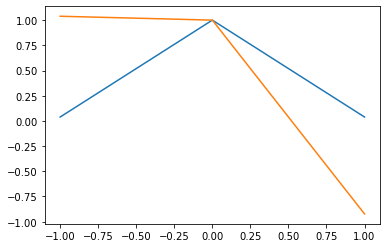

In [115]:
#shape of M = 3 is probably the closest shape to the original
M = 3
N = 3
xobs = np.linspace(-1, 1, M)
#print(xobs)
yobs = 1 / (1 + 25 * xobs ** 2)
#print(yobs)
X = makeMatrix(M,N)
a = solvev1(X, yobs)
print(a)
yhat = approx(a, xobs, M, N)    
print(yhat)
plt.plot(xobs, yobs)
plt.plot(xobs, np.transpose(yhat))

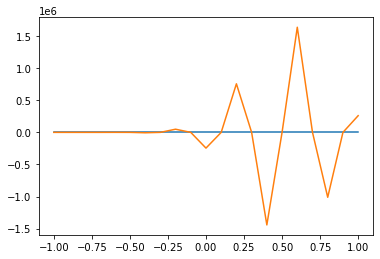

In [117]:
M = 21
N = 21
xobs = np.linspace(-1, 1, M)
#print(xobs)
yobs = 1 / (1 + 25 * xobs ** 2)
#print(yobs)
X = makeMatrix(M,N)
a = solvev1(X, yobs)
#print(a)
yhat = approx(a, xobs, M, N)    
#print(yhat)
plt.plot(xobs, yobs)
plt.plot(xobs, np.transpose(yhat))

In [118]:
def solvev2(x, y):
    #calculates the psuedoinverse of the matrix and multiplies it by y
    Xinv = np.matmul(np.linalg.inv(np.matmul(np.transpose(x),x)), np.transpose(x))
    alpha = np.matmul(Xinv, y)
    return alpha